# Regularization and Optimization of Neural Networks - Lab

## Introduction

Recall from the last lab that we had a training accuracy close to 90% and a test set accuracy close to 76%.

As with our previous machine learning work, we should be asking a couple of questions:
- Is there a high bias? yes/no
- Is there a high variance? yes/no

Also recall that "high bias" is a relative concept. Knowing we have 7 classes and the topics are related, we'll assume that a 90% accuracy is pretty good and the bias on the training set is low. (We've also discussed concepts like precision, recall as well as AUC and ROC curves.)   

In this lab, we'll use the notion of training/validation/test set to get better insights of how we can mitigate our variance, and we'll look at a few regularization techniques. You'll start by repeating the process from the last section: importing the data and performing preprocessing including one-hot encoding. Then, just before you go on to train the model, we'll introduce how to include a validation set. You'll then define and compile the model as before. This time, when you are presented with the `history` dictionary of the model, you will have additional data entries for not only the train and test, but the train, test and validation  and then defigning, compiling and training the model. 


## Objectives

You will be able to:

* Construct and run a basic model in Keras
* Construct a validation set and explain potential benefits.
* Apply L1 and L2 regularization.
* Aplly dropout regularization.
* Observe and comment on the effect of using more data.

## Import the libraries

As usual, start by importing some of the packages and modules that you intend to use. The first thing we'll be doing is importing the data and taking a random sample, so that should clue you in to what tools to import. If you need more tools down the line, you can always import additional packages later.

In [1]:
#Your code here; import some packages/modules you plan to use
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn import preprocessing
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


## Load the Data

As with the previous lab, the data is stored in a file **Bank_complaints.csv**. Load and preview the dataset.

In [2]:
#Your code here; load and preview the dataset
df = pd.read_csv('Bank_complaints.csv')
df.head()
df.shape

(60000, 2)

## Preprocessing Overview

Before we begin to practice some of our new tools regarding regularization and optimization, let's practice munging some data as we did in the previous section with bank complaints. Recall some techniques:

* Sampling in order to reduce training time (investigate model accuracy vs data size later on)
* One-hot encoding our complaint text
* Transforming our category labels
* Train - test split

## Preprocessing: Generate a Random Sample

Since we have quite a bit of data and training networks takes a substantial amount of time and resources, we will downsample in order to test our initial pipeline. Going forward, these can be interesting areas of investigation: how does our models performance change as we increase (or decrease) the size of our dataset?  

Generate the random sample using seed 123 for consistency of results. Make your new sample have 10,000 observations.

In [3]:
#Your code here
random.seed(123)
random_sample = df.sample(10000)
product = df["Product"]
complaints = df["Consumer complaint narrative"]

## Preprocessing: One-hot Encoding of the Complaints

As before, we need to do some preprocessing and data manipulationg before building the neural network. Last time, we guided you through the process, and now its time for you to practice that pipeline independently.  

Only keep 2,000 most common words and use one-hot encoding to reformat the complaints into a matrix of vectors.

In [4]:
#Your code here; use one-hot encoding to reformat the complaints into a matrix of vectors.
#Only keep the 2000 most common words.

tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(complaints)

one_hot_results= tokenizer.texts_to_matrix(complaints, mode='binary')
word_index = tokenizer.word_index
np.shape(one_hot_results)


(60000, 2000)

## Preprocessing: Encoding the Products

Similarly, now transform the descriptive product labels to integers labels. After transforming them to integer labels, retransform them into a matrix of binary flags, one for each of the various product labels.  
  
  (Note: this is similar to our previous work with dummy variables: each of the various product categories will be its own column, and each observation will be a row. Each of these observation rows will have a 1 in the column associated with it's label, and all other entries for the row will be zero.)

In [5]:
#Your code here; transform the product labels to numerical values
#Then transform these integer values into a matrix of binary flags
le = preprocessing.LabelEncoder()
le.fit(product)
product_cat = le.transform(product) 

product_onehot = to_categorical(product_cat)

## Train-test Split

Now onto the ever familiar train-test split! Be sure to split both the complaint data (now transformed into word vectors) as well as their associated labels. Perform an appropriate train test split.

In [6]:
#Your code here
X_train, X_test, y_train, y_test = train_test_split(one_hot_results, product_onehot, test_size=1500, random_state=42)

## Running the model using a validation set.

## Creating the Validation Set

In the lecture we mentioned that in deep learning, we generally keep aside a validation set, which is used during hyperparameter tuning. Then when we have made the final model decision, the test set is used to define the final model perforance. 

In this example, let's take the first 1000 cases out of the training set to become the validation set. You should do this for both `train` and `label_train`.

In [7]:
#Just run this block of code 
random.seed(123)
val = X_train[:1000]
train_final = X_train[1000:]
label_val = y_train[:1000]
label_train_final = y_train[1000:]

## Creating the Model

Let's rebuild a fully connected (Dense) layer network with relu activations in Keras.

Recall that we used 2 hidden with 50 units in the first layer and 25 in the second, both with a `relu` activation function. Because we are dealing with a multiclass problem (classifying the complaints into 7 classes), we use a use a softmax classifyer in order to output 7 class probabilities per case.  



In [8]:
#Your code here; build a neural network using Keras as described above.
model = random.seed(123)
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(50, activation='relu', input_shape=(2000,))) #2 hidden layers
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

## Compiling the Model
In the compiler, you'll be passing the optimizer, loss function, and metrics. Train the model for 120 epochs in mini-batches of 256 samples. This time, let's include the argument `validation_data` and assign it `(val, label_val)`

In [9]:
#Your code here
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Part 2: Code Along

The remaining portion of this lab will introduce you to code snippets for a myriad of different methods discussed in the lecture.

## Training the Model

Ok, now for the resource intensive part: time to train our model! Note that this is where we also introduce the validation data to the model.

In [10]:
#Code provided; note the extra validation parameter passed.
model_val = model.fit(train_final,
                    label_train_final,
                    epochs=120,
                    batch_size=256,
                    validation_data=(val, label_val))

Train on 57500 samples, validate on 1000 samples
Epoch 1/120
57500/57500 [==============================] - 2s 32us/step - loss: 1.9005 - acc: 0.2262 - val_loss: 1.8265 - val_acc: 0.2930
Epoch 2/120
57500/57500 [==============================] - 2s 28us/step - loss: 1.7185 - acc: 0.3794 - val_loss: 1.5615 - val_acc: 0.4960
Epoch 3/120
57500/57500 [==============================] - 2s 28us/step - loss: 1.3821 - acc: 0.5822 - val_loss: 1.1865 - val_acc: 0.6460
Epoch 4/120
57500/57500 [==============================] - 2s 28us/step - loss: 1.0549 - acc: 0.6756 - val_loss: 0.9252 - val_acc: 0.7120
Epoch 5/120
57500/57500 [==============================] - 2s 27us/step - loss: 0.8646 - acc: 0.7139 - val_loss: 0.7863 - val_acc: 0.7380
Epoch 6/120
57500/57500 [==============================] - 2s 31us/step - loss: 0.7637 - acc: 0.7373 - val_loss: 0.7072 - val_acc: 0.7640
Epoch 7/120
57500/57500 [==============================] - 2s 28us/step - loss: 0.7048 - acc: 0.7509 - val_loss: 0.6583 - v

57500/57500 [==============================] - 2s 28us/step - loss: 0.3944 - acc: 0.8607 - val_loss: 0.4695 - val_acc: 0.8320
Epoch 60/120
57500/57500 [==============================] - 2s 28us/step - loss: 0.3929 - acc: 0.8608 - val_loss: 0.4688 - val_acc: 0.8300
Epoch 61/120
57500/57500 [==============================] - 2s 32us/step - loss: 0.3916 - acc: 0.8613 - val_loss: 0.4672 - val_acc: 0.8310
Epoch 62/120
57500/57500 [==============================] - 2s 28us/step - loss: 0.3901 - acc: 0.8618 - val_loss: 0.4677 - val_acc: 0.8320
Epoch 63/120
57500/57500 [==============================] - 2s 28us/step - loss: 0.3887 - acc: 0.8632 - val_loss: 0.4697 - val_acc: 0.8300
Epoch 64/120
57500/57500 [==============================] - 2s 28us/step - loss: 0.3874 - acc: 0.8626 - val_loss: 0.4691 - val_acc: 0.8290
Epoch 65/120
57500/57500 [==============================] - 2s 28us/step - loss: 0.3857 - acc: 0.8632 - val_loss: 0.4728 - val_acc: 0.8300
Epoch 66/120
57500/57500 [==============

Epoch 118/120
57500/57500 [==============================] - 2s 28us/step - loss: 0.3365 - acc: 0.8812 - val_loss: 0.4966 - val_acc: 0.8200
Epoch 119/120
57500/57500 [==============================] - 2s 28us/step - loss: 0.3356 - acc: 0.8812 - val_loss: 0.5006 - val_acc: 0.8230
Epoch 120/120
57500/57500 [==============================] - 2s 28us/step - loss: 0.3349 - acc: 0.8825 - val_loss: 0.4954 - val_acc: 0.8140


## Retrieving Performance Results: the `history` dictionary

The dictionary `history` contains four entries this time: one per metric that was being monitored during training and during validation.

In [11]:
model_val_dict = model_val.history
model_val_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [12]:
results_train = model.evaluate(train_final, label_train_final)

57500/57500 [==============================] - 3s 44us/step


In [13]:
results_test = model.evaluate(X_test, y_test)

1500/1500 [==============================] - 0s 57us/step


In [14]:
results_train

[0.3303531802073769, 0.8823826086997986]

In [15]:
results_test

[0.582646284421285, 0.7979999996821086]

Note that the result isn't exactly the same as before. Note that this because the training set is slightly different! We remove 1000 instances for validation!

## Plotting the Results

Let's plot the result similarly to what we have done in the previous lab. This time though, let's include the training and the validation loss in the same plot. We'll do the same thing for the training and validation accuracy.

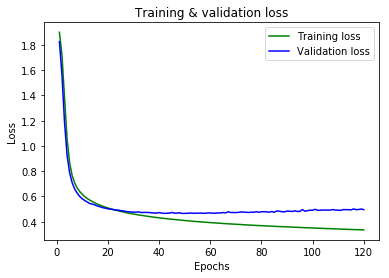

In [16]:
plt.clf()

import matplotlib.pyplot as plt
loss_values = model_val_dict['loss']
val_loss_values = model_val_dict['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'g', label='Training loss')
plt.plot(epochs, val_loss_values, 'blue', label='Validation loss')

plt.title('Training & validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

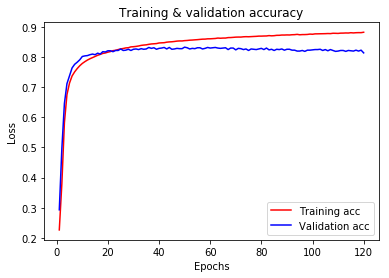

In [17]:
plt.clf()

acc_values = model_val_dict['acc'] 
val_acc_values = model_val_dict['val_acc']

plt.plot(epochs, acc_values, 'r', label='Training acc')
plt.plot(epochs, val_acc_values, 'blue', label='Validation acc')
plt.title('Training & validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

We observe an interesting pattern here: although the training accuracy keeps increasing when going through more epochs, and the training loss keeps decreasing, the validation accuracy and loss seem to be reaching a status quo around the 60th epoch. This means that we're actually **overfitting** to the train data when we do as many epochs as we were doing. Luckily, you learned how to tackle overfitting in the previous lecture! For starters, it does seem clear that we are training too long. So let's stop training at the 60th epoch first (so-called "early stopping") before we move to more advanced regularization techniques!

## Early Stopping

In [18]:
random.seed(123)
model = models.Sequential()
model.add(layers.Dense(50, activation='relu', input_shape=(2000,))) #2 hidden layers
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

final_model = model.fit(train_final,
                    label_train_final,
                    epochs=60,
                    batch_size=256,
                    validation_data=(val, label_val))

Train on 57500 samples, validate on 1000 samples
Epoch 1/60
57500/57500 [==============================] - 2s 30us/step - loss: 1.8898 - acc: 0.1971 - val_loss: 1.8182 - val_acc: 0.2330
Epoch 2/60
57500/57500 [==============================] - 2s 27us/step - loss: 1.7148 - acc: 0.3108 - val_loss: 1.6008 - val_acc: 0.3750
Epoch 3/60
57500/57500 [==============================] - 2s 30us/step - loss: 1.4637 - acc: 0.4687 - val_loss: 1.3155 - val_acc: 0.5440
Epoch 4/60
57500/57500 [==============================] - 2s 29us/step - loss: 1.1642 - acc: 0.6213 - val_loss: 1.0345 - val_acc: 0.6700
Epoch 5/60
57500/57500 [==============================] - 2s 28us/step - loss: 0.9385 - acc: 0.6985 - val_loss: 0.8563 - val_acc: 0.7270
Epoch 6/60
57500/57500 [==============================] - 2s 28us/step - loss: 0.8055 - acc: 0.7286 - val_loss: 0.7534 - val_acc: 0.7460
Epoch 7/60
57500/57500 [==============================] - 2s 28us/step - loss: 0.7301 - acc: 0.7440 - val_loss: 0.6913 - val_acc:

57500/57500 [==============================] - 2s 28us/step - loss: 0.3908 - acc: 0.8620 - val_loss: 0.4780 - val_acc: 0.8220


Now, you can use the test set to make label predictions

In [19]:
results_train = model.evaluate(train_final, label_train_final)

57500/57500 [==============================] - 3s 44us/step


In [20]:
results_test = model.evaluate(X_test, y_test)

1500/1500 [==============================] - 0s 44us/step


In [21]:
results_train

[0.3871865220899167, 0.8624869565258856]

In [22]:
results_test

[0.5503462923367818, 0.7959999996821085]

We've significantly reduced the variance, so this is already pretty good! Our test set accuracy is slightly worse, but this model will definitely be more robust than the 120 epochs one we fitted before.

Now, let's see what else we can do to improve the result!

## L2 Regularization

Let's include L2 regularization. You can easily do this in keras adding the argument kernel_regulizers.l2 and adding a value for the regularization parameter lambda between parentheses.

In [23]:
from keras import regularizers
random.seed(123)
model = models.Sequential()
model.add(layers.Dense(50, activation='relu',kernel_regularizer=regularizers.l2(0.005), input_shape=(2000,))) #2 hidden layers
model.add(layers.Dense(25, kernel_regularizer=regularizers.l2(0.005), activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

L2_model = model.fit(train_final,
                    label_train_final,
                    epochs=120,
                    batch_size=256,
                    validation_data=(val, label_val))

Train on 57500 samples, validate on 1000 samples
Epoch 1/120
57500/57500 [==============================] - 2s 32us/step - loss: 2.5194 - acc: 0.2338 - val_loss: 2.3886 - val_acc: 0.3350
Epoch 2/120
57500/57500 [==============================] - 2s 29us/step - loss: 2.1918 - acc: 0.4437 - val_loss: 2.0099 - val_acc: 0.5130
Epoch 3/120
57500/57500 [==============================] - 2s 34us/step - loss: 1.8422 - acc: 0.6024 - val_loss: 1.6983 - val_acc: 0.6540
Epoch 4/120
57500/57500 [==============================] - 2s 29us/step - loss: 1.5905 - acc: 0.6865 - val_loss: 1.4963 - val_acc: 0.7130
Epoch 5/120
57500/57500 [==============================] - 2s 29us/step - loss: 1.4338 - acc: 0.7194 - val_loss: 1.3720 - val_acc: 0.7310
Epoch 6/120
57500/57500 [==============================] - 2s 29us/step - loss: 1.3355 - acc: 0.7370 - val_loss: 1.2916 - val_acc: 0.7540
Epoch 7/120
57500/57500 [==============================] - 2s 29us/step - loss: 1.2679 - acc: 0.7507 - val_loss: 1.2335 - v

57500/57500 [==============================] - 2s 29us/step - loss: 0.6202 - acc: 0.8509 - val_loss: 0.6531 - val_acc: 0.8260
Epoch 60/120
57500/57500 [==============================] - 2s 30us/step - loss: 0.6173 - acc: 0.8517 - val_loss: 0.6501 - val_acc: 0.8250
Epoch 61/120
57500/57500 [==============================] - 2s 32us/step - loss: 0.6145 - acc: 0.8517 - val_loss: 0.6503 - val_acc: 0.8240
Epoch 62/120
57500/57500 [==============================] - 2s 29us/step - loss: 0.6117 - acc: 0.8522 - val_loss: 0.6445 - val_acc: 0.8290
Epoch 63/120
57500/57500 [==============================] - 2s 29us/step - loss: 0.6093 - acc: 0.8526 - val_loss: 0.6428 - val_acc: 0.8270
Epoch 64/120
57500/57500 [==============================] - 2s 29us/step - loss: 0.6069 - acc: 0.8522 - val_loss: 0.6416 - val_acc: 0.8270
Epoch 65/120
57500/57500 [==============================] - 2s 29us/step - loss: 0.6042 - acc: 0.8522 - val_loss: 0.6430 - val_acc: 0.8310
Epoch 66/120
57500/57500 [==============

Epoch 118/120
57500/57500 [==============================] - 2s 29us/step - loss: 0.5418 - acc: 0.8614 - val_loss: 0.5986 - val_acc: 0.8230
Epoch 119/120
57500/57500 [==============================] - 2s 30us/step - loss: 0.5411 - acc: 0.8619 - val_loss: 0.5951 - val_acc: 0.8280
Epoch 120/120
57500/57500 [==============================] - 2s 29us/step - loss: 0.5407 - acc: 0.8614 - val_loss: 0.5970 - val_acc: 0.8220


In [24]:
L2_model_dict = L2_model.history
L2_model_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

Let's look at the training accuracy as well as the validation accuracy for both the L2 and the model without regularization (for 120 epochs).

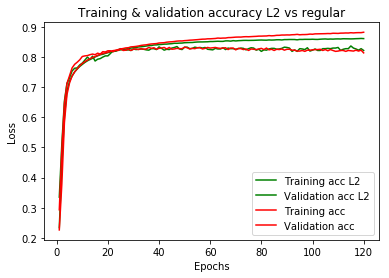

In [25]:
plt.clf()

acc_values = L2_model_dict['acc'] 
val_acc_values = L2_model_dict['val_acc']
model_acc = model_val_dict['acc']
model_val_acc = model_val_dict['val_acc']

epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'g', label='Training acc L2')
plt.plot(epochs, val_acc_values, 'g', label='Validation acc L2')
plt.plot(epochs, model_acc, 'r', label='Training acc')
plt.plot(epochs, model_val_acc, 'r', label='Validation acc')
plt.title('Training & validation accuracy L2 vs regular')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The results of L2 regularization are quite disappointing here. We notice the discrepancy between validation and training accuracy seems to have decreased slightly, but the end result is definitely not getting better. 

## L1 Regularization

Let's have a look at L1 regularization. Will this work better?

In [26]:
random.seed(123)
model = models.Sequential()
model.add(layers.Dense(50, activation='relu',kernel_regularizer=regularizers.l1(0.005), input_shape=(2000,))) #2 hidden layers
model.add(layers.Dense(25, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

L1_model = model.fit(train_final,
                    label_train_final,
                    epochs=120,
                    batch_size=256,
                    validation_data=(val, label_val))

Train on 57500 samples, validate on 1000 samples
Epoch 1/120
57500/57500 [==============================] - 2s 32us/step - loss: 13.6098 - acc: 0.2207 - val_loss: 11.0606 - val_acc: 0.2750
Epoch 2/120
57500/57500 [==============================] - 2s 29us/step - loss: 8.9207 - acc: 0.4006 - val_loss: 6.9514 - val_acc: 0.4890
Epoch 3/120
57500/57500 [==============================] - 2s 29us/step - loss: 5.4333 - acc: 0.5619 - val_loss: 4.1055 - val_acc: 0.5850
Epoch 4/120
57500/57500 [==============================] - 2s 30us/step - loss: 3.2208 - acc: 0.6273 - val_loss: 2.5185 - val_acc: 0.6430
Epoch 5/120
57500/57500 [==============================] - 2s 33us/step - loss: 2.1998 - acc: 0.6511 - val_loss: 2.0155 - val_acc: 0.6460
Epoch 6/120
57500/57500 [==============================] - 2s 30us/step - loss: 1.9490 - acc: 0.6598 - val_loss: 1.8810 - val_acc: 0.6600
Epoch 7/120
57500/57500 [==============================] - 2s 30us/step - loss: 1.8351 - acc: 0.6683 - val_loss: 1.7804 -

57500/57500 [==============================] - 2s 29us/step - loss: 0.9335 - acc: 0.7532 - val_loss: 0.9072 - val_acc: 0.7670
Epoch 60/120
57500/57500 [==============================] - 2s 29us/step - loss: 0.9315 - acc: 0.7535 - val_loss: 0.9043 - val_acc: 0.7620
Epoch 61/120
57500/57500 [==============================] - 2s 30us/step - loss: 0.9294 - acc: 0.7533 - val_loss: 0.9023 - val_acc: 0.7650
Epoch 62/120
57500/57500 [==============================] - 2s 30us/step - loss: 0.9279 - acc: 0.7540 - val_loss: 0.9078 - val_acc: 0.7670
Epoch 63/120
57500/57500 [==============================] - 2s 30us/step - loss: 0.9260 - acc: 0.7545 - val_loss: 0.9024 - val_acc: 0.7660
Epoch 64/120
57500/57500 [==============================] - 2s 31us/step - loss: 0.9237 - acc: 0.7549 - val_loss: 0.8989 - val_acc: 0.7640
Epoch 65/120
57500/57500 [==============================] - 2s 30us/step - loss: 0.9224 - acc: 0.7547 - val_loss: 0.8957 - val_acc: 0.7660
Epoch 66/120
57500/57500 [==============

Epoch 118/120
57500/57500 [==============================] - 2s 30us/step - loss: 0.8658 - acc: 0.7662 - val_loss: 0.8377 - val_acc: 0.7710
Epoch 119/120
57500/57500 [==============================] - 2s 31us/step - loss: 0.8654 - acc: 0.7662 - val_loss: 0.8366 - val_acc: 0.7820
Epoch 120/120
57500/57500 [==============================] - 2s 30us/step - loss: 0.8643 - acc: 0.7668 - val_loss: 0.8374 - val_acc: 0.7840


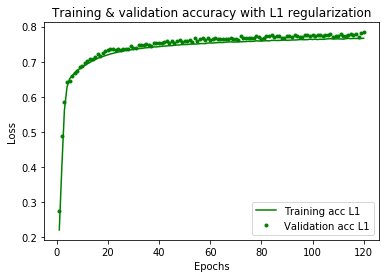

In [27]:
L1_model_dict = L1_model.history
plt.clf()

acc_values = L1_model_dict['acc'] 
val_acc_values = L1_model_dict['val_acc']

epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'g', label='Training acc L1')
plt.plot(epochs, val_acc_values, 'g.', label='Validation acc L1')
plt.title('Training & validation accuracy with L1 regularization')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Notice how The training and validation accuracy don't diverge as much as before! Unfortunately, the validation accuracy doesn't reach rates much higher than 70%. It does seem like we can still improve the model by training much longer.

In [28]:
random.seed(123)
model = models.Sequential()
model.add(layers.Dense(50, activation='relu',kernel_regularizer=regularizers.l1(0.005), input_shape=(2000,))) #2 hidden layers
model.add(layers.Dense(25, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

L1_model = model.fit(train_final,
                    label_train_final,
                    epochs=1000,
                    batch_size=256,
                    validation_data=(val, label_val))

Train on 57500 samples, validate on 1000 samples
Epoch 1/1000
57500/57500 [==============================] - 2s 32us/step - loss: 13.7017 - acc: 0.2068 - val_loss: 11.1667 - val_acc: 0.2510
Epoch 2/1000
57500/57500 [==============================] - 2s 29us/step - loss: 9.0412 - acc: 0.3284 - val_loss: 7.0697 - val_acc: 0.4530
Epoch 3/1000
57500/57500 [==============================] - 2s 30us/step - loss: 5.5442 - acc: 0.5469 - val_loss: 4.2037 - val_acc: 0.6160
Epoch 4/1000
57500/57500 [==============================] - 2s 30us/step - loss: 3.3043 - acc: 0.6476 - val_loss: 2.5850 - val_acc: 0.6660
Epoch 5/1000
57500/57500 [==============================] - 2s 30us/step - loss: 2.2554 - acc: 0.6793 - val_loss: 2.0568 - val_acc: 0.6900
Epoch 6/1000
57500/57500 [==============================] - 2s 30us/step - loss: 1.9819 - acc: 0.6926 - val_loss: 1.8999 - val_acc: 0.7020
Epoch 7/1000
57500/57500 [==============================] - 2s 29us/step - loss: 1.8519 - acc: 0.6998 - val_loss: 1

57500/57500 [==============================] - 2s 29us/step - loss: 0.9226 - acc: 0.7563 - val_loss: 0.8961 - val_acc: 0.7720
Epoch 60/1000
57500/57500 [==============================] - 2s 29us/step - loss: 0.9195 - acc: 0.7567 - val_loss: 0.8981 - val_acc: 0.7610
Epoch 61/1000
57500/57500 [==============================] - 2s 29us/step - loss: 0.9168 - acc: 0.7581 - val_loss: 0.8897 - val_acc: 0.7740
Epoch 62/1000
57500/57500 [==============================] - 2s 29us/step - loss: 0.9137 - acc: 0.7585 - val_loss: 0.8864 - val_acc: 0.7720
Epoch 63/1000
57500/57500 [==============================] - 2s 29us/step - loss: 0.9111 - acc: 0.7576 - val_loss: 0.8813 - val_acc: 0.7770
Epoch 64/1000
57500/57500 [==============================] - 2s 29us/step - loss: 0.9075 - acc: 0.7592 - val_loss: 0.8832 - val_acc: 0.7730
Epoch 65/1000
57500/57500 [==============================] - 2s 29us/step - loss: 0.9047 - acc: 0.7587 - val_loss: 0.8796 - val_acc: 0.7710
Epoch 66/1000
57500/57500 [=======

57500/57500 [==============================] - 2s 29us/step - loss: 0.8441 - acc: 0.7713 - val_loss: 0.8106 - val_acc: 0.7900
Epoch 118/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.8436 - acc: 0.7716 - val_loss: 0.8113 - val_acc: 0.7850
Epoch 119/1000
57500/57500 [==============================] - 2s 32us/step - loss: 0.8428 - acc: 0.7713 - val_loss: 0.8096 - val_acc: 0.7850
Epoch 120/1000
57500/57500 [==============================] - 2s 31us/step - loss: 0.8430 - acc: 0.7715 - val_loss: 0.8079 - val_acc: 0.7900
Epoch 121/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.8413 - acc: 0.7724 - val_loss: 0.8154 - val_acc: 0.7850
Epoch 122/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.8412 - acc: 0.7718 - val_loss: 0.8098 - val_acc: 0.7840
Epoch 123/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.8405 - acc: 0.7719 - val_loss: 0.8111 - val_acc: 0.7900
Epoch 124/1000
57500/57500 [

57500/57500 [==============================] - 2s 30us/step - loss: 0.8121 - acc: 0.7820 - val_loss: 0.7851 - val_acc: 0.8030
Epoch 176/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.8115 - acc: 0.7835 - val_loss: 0.7928 - val_acc: 0.7930
Epoch 177/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.8106 - acc: 0.7831 - val_loss: 0.7795 - val_acc: 0.7980
Epoch 178/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.8108 - acc: 0.7833 - val_loss: 0.7790 - val_acc: 0.8020
Epoch 179/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.8110 - acc: 0.7828 - val_loss: 0.7761 - val_acc: 0.8030
Epoch 180/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.8093 - acc: 0.7833 - val_loss: 0.7871 - val_acc: 0.7960
Epoch 181/1000
57500/57500 [==============================] - 2s 29us/step - loss: 0.8108 - acc: 0.7839 - val_loss: 0.7778 - val_acc: 0.8010
Epoch 182/1000
57500/57500 [

57500/57500 [==============================] - 2s 30us/step - loss: 0.7909 - acc: 0.7899 - val_loss: 0.7491 - val_acc: 0.8140
Epoch 234/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.7912 - acc: 0.7911 - val_loss: 0.7687 - val_acc: 0.8050
Epoch 235/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.7929 - acc: 0.7899 - val_loss: 0.7588 - val_acc: 0.8010
Epoch 236/1000
57500/57500 [==============================] - 2s 29us/step - loss: 0.7906 - acc: 0.7899 - val_loss: 0.7639 - val_acc: 0.8040
Epoch 237/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.7912 - acc: 0.7905 - val_loss: 0.7793 - val_acc: 0.8090
Epoch 238/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.7909 - acc: 0.7905 - val_loss: 0.7485 - val_acc: 0.8110
Epoch 239/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.7891 - acc: 0.7921 - val_loss: 0.7546 - val_acc: 0.8150
Epoch 240/1000
57500/57500 [

57500/57500 [==============================] - 2s 33us/step - loss: 0.7826 - acc: 0.7920 - val_loss: 0.7553 - val_acc: 0.7980
Epoch 292/1000
57500/57500 [==============================] - 2s 35us/step - loss: 0.7867 - acc: 0.7919 - val_loss: 0.7536 - val_acc: 0.8070
Epoch 293/1000
57500/57500 [==============================] - 2s 29us/step - loss: 0.7827 - acc: 0.7937 - val_loss: 0.8527 - val_acc: 0.7490
Epoch 294/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.7828 - acc: 0.7935 - val_loss: 0.7427 - val_acc: 0.8110
Epoch 295/1000
57500/57500 [==============================] - 2s 29us/step - loss: 0.7842 - acc: 0.7919 - val_loss: 0.7413 - val_acc: 0.8100
Epoch 296/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.7832 - acc: 0.7951 - val_loss: 0.7463 - val_acc: 0.8120
Epoch 297/1000
57500/57500 [==============================] - 2s 29us/step - loss: 0.7887 - acc: 0.7914 - val_loss: 0.7386 - val_acc: 0.8140
Epoch 298/1000
57500/57500 [

57500/57500 [==============================] - 2s 29us/step - loss: 0.7777 - acc: 0.7951 - val_loss: 0.7526 - val_acc: 0.8030
Epoch 350/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.7886 - acc: 0.7914 - val_loss: 0.7555 - val_acc: 0.7930
Epoch 351/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.7791 - acc: 0.7931 - val_loss: 0.7472 - val_acc: 0.8060
Epoch 352/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.7746 - acc: 0.7956 - val_loss: 0.7735 - val_acc: 0.7860
Epoch 353/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.7784 - acc: 0.7935 - val_loss: 1.0383 - val_acc: 0.7140
Epoch 354/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.7862 - acc: 0.7917 - val_loss: 0.7382 - val_acc: 0.8220
Epoch 355/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.7763 - acc: 0.7946 - val_loss: 0.7569 - val_acc: 0.8060
Epoch 356/1000
57500/57500 [

57500/57500 [==============================] - 2s 29us/step - loss: 0.7776 - acc: 0.7942 - val_loss: 0.7944 - val_acc: 0.7890
Epoch 408/1000
57500/57500 [==============================] - 2s 29us/step - loss: 0.7727 - acc: 0.7952 - val_loss: 0.7517 - val_acc: 0.7970
Epoch 409/1000
57500/57500 [==============================] - 2s 29us/step - loss: 0.7854 - acc: 0.7890 - val_loss: 0.7237 - val_acc: 0.8180
Epoch 410/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.7761 - acc: 0.7935 - val_loss: 0.7471 - val_acc: 0.8020
Epoch 411/1000
57500/57500 [==============================] - 2s 29us/step - loss: 0.7746 - acc: 0.7937 - val_loss: 0.7485 - val_acc: 0.8100
Epoch 412/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.7758 - acc: 0.7948 - val_loss: 0.7390 - val_acc: 0.8130
Epoch 413/1000
57500/57500 [==============================] - 2s 29us/step - loss: 0.7770 - acc: 0.7935 - val_loss: 0.7534 - val_acc: 0.8060
Epoch 414/1000
57500/57500 [

57500/57500 [==============================] - 2s 32us/step - loss: 0.7709 - acc: 0.7952 - val_loss: 0.7651 - val_acc: 0.8060
Epoch 466/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.7764 - acc: 0.7926 - val_loss: 0.7337 - val_acc: 0.8190
Epoch 467/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.7708 - acc: 0.7946 - val_loss: 0.7124 - val_acc: 0.8270
Epoch 468/1000
57500/57500 [==============================] - 2s 29us/step - loss: 0.7730 - acc: 0.7931 - val_loss: 0.7359 - val_acc: 0.8070
Epoch 469/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.7737 - acc: 0.7950 - val_loss: 0.7252 - val_acc: 0.8130
Epoch 470/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.7681 - acc: 0.7957 - val_loss: 0.7585 - val_acc: 0.8070
Epoch 471/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.7671 - acc: 0.7964 - val_loss: 0.7275 - val_acc: 0.8070
Epoch 472/1000
57500/57500 [

57500/57500 [==============================] - 2s 30us/step - loss: 0.7727 - acc: 0.7929 - val_loss: 0.7548 - val_acc: 0.7910
Epoch 524/1000
57500/57500 [==============================] - 2s 29us/step - loss: 0.7660 - acc: 0.7958 - val_loss: 0.7146 - val_acc: 0.8160
Epoch 525/1000
57500/57500 [==============================] - 2s 29us/step - loss: 0.7699 - acc: 0.7940 - val_loss: 0.7335 - val_acc: 0.8170
Epoch 526/1000
57500/57500 [==============================] - 2s 29us/step - loss: 0.7773 - acc: 0.7930 - val_loss: 0.7269 - val_acc: 0.8220
Epoch 527/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.7924 - acc: 0.7891 - val_loss: 0.7575 - val_acc: 0.8140
Epoch 528/1000
57500/57500 [==============================] - 2s 29us/step - loss: 0.7745 - acc: 0.7931 - val_loss: 0.7292 - val_acc: 0.8150
Epoch 529/1000
57500/57500 [==============================] - 2s 29us/step - loss: 0.7712 - acc: 0.7948 - val_loss: 0.7227 - val_acc: 0.8150
Epoch 530/1000
57500/57500 [

57500/57500 [==============================] - 2s 30us/step - loss: 0.7668 - acc: 0.7941 - val_loss: 0.8555 - val_acc: 0.7450
Epoch 582/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.7643 - acc: 0.7949 - val_loss: 0.7595 - val_acc: 0.8010
Epoch 583/1000
57500/57500 [==============================] - 2s 29us/step - loss: 0.7705 - acc: 0.7929 - val_loss: 0.7846 - val_acc: 0.7950
Epoch 584/1000
57500/57500 [==============================] - 2s 29us/step - loss: 0.7661 - acc: 0.7947 - val_loss: 0.7232 - val_acc: 0.8050
Epoch 585/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.7723 - acc: 0.7930 - val_loss: 0.7346 - val_acc: 0.8100
Epoch 586/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.7629 - acc: 0.7949 - val_loss: 0.7560 - val_acc: 0.7930
Epoch 587/1000
57500/57500 [==============================] - 2s 33us/step - loss: 0.7702 - acc: 0.7938 - val_loss: 0.7702 - val_acc: 0.7850
Epoch 588/1000
57500/57500 [

57500/57500 [==============================] - 2s 29us/step - loss: 0.7685 - acc: 0.7928 - val_loss: 0.7155 - val_acc: 0.8170
Epoch 640/1000
57500/57500 [==============================] - 2s 33us/step - loss: 0.7647 - acc: 0.7952 - val_loss: 0.7151 - val_acc: 0.8090
Epoch 641/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.7658 - acc: 0.7950 - val_loss: 0.7460 - val_acc: 0.7940
Epoch 642/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.7689 - acc: 0.7938 - val_loss: 0.7593 - val_acc: 0.8070
Epoch 643/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.7718 - acc: 0.7913 - val_loss: 0.7387 - val_acc: 0.8160
Epoch 644/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.7622 - acc: 0.7955 - val_loss: 0.7398 - val_acc: 0.8020
Epoch 645/1000
57500/57500 [==============================] - 2s 29us/step - loss: 0.7654 - acc: 0.7939 - val_loss: 0.7141 - val_acc: 0.8130
Epoch 646/1000
57500/57500 [

57500/57500 [==============================] - 2s 29us/step - loss: 0.7701 - acc: 0.7905 - val_loss: 0.7219 - val_acc: 0.8100
Epoch 698/1000
57500/57500 [==============================] - 2s 29us/step - loss: 0.7622 - acc: 0.7935 - val_loss: 0.7581 - val_acc: 0.7970
Epoch 699/1000
57500/57500 [==============================] - 2s 29us/step - loss: 0.7697 - acc: 0.7919 - val_loss: 0.7162 - val_acc: 0.8220
Epoch 700/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.7677 - acc: 0.7936 - val_loss: 0.7209 - val_acc: 0.8140
Epoch 701/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.7723 - acc: 0.7914 - val_loss: 0.7425 - val_acc: 0.8090
Epoch 702/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.7585 - acc: 0.7962 - val_loss: 0.7529 - val_acc: 0.7850
Epoch 703/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.7627 - acc: 0.7950 - val_loss: 0.7830 - val_acc: 0.7790
Epoch 704/1000
57500/57500 [

57500/57500 [==============================] - 2s 28us/step - loss: 0.7627 - acc: 0.7951 - val_loss: 0.7221 - val_acc: 0.8060
Epoch 756/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.7628 - acc: 0.7927 - val_loss: 0.7348 - val_acc: 0.8150
Epoch 757/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.7627 - acc: 0.7938 - val_loss: 0.7215 - val_acc: 0.8080
Epoch 758/1000
57500/57500 [==============================] - 2s 29us/step - loss: 0.7647 - acc: 0.7934 - val_loss: 0.7986 - val_acc: 0.7750
Epoch 759/1000
57500/57500 [==============================] - 2s 29us/step - loss: 0.7646 - acc: 0.7933 - val_loss: 0.7485 - val_acc: 0.7930
Epoch 760/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.7582 - acc: 0.7937 - val_loss: 0.7015 - val_acc: 0.8280
Epoch 761/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.7640 - acc: 0.7938 - val_loss: 0.8225 - val_acc: 0.7790
Epoch 762/1000
57500/57500 [

57500/57500 [==============================] - 2s 29us/step - loss: 0.7588 - acc: 0.7945 - val_loss: 0.7343 - val_acc: 0.8000
Epoch 814/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.7648 - acc: 0.7926 - val_loss: 0.7111 - val_acc: 0.8040
Epoch 815/1000
57500/57500 [==============================] - 2s 33us/step - loss: 0.7632 - acc: 0.7932 - val_loss: 0.7655 - val_acc: 0.7880
Epoch 816/1000
57500/57500 [==============================] - 2s 29us/step - loss: 0.7620 - acc: 0.7931 - val_loss: 0.7083 - val_acc: 0.8070
Epoch 817/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.7710 - acc: 0.7913 - val_loss: 0.7284 - val_acc: 0.8010
Epoch 818/1000
57500/57500 [==============================] - 2s 29us/step - loss: 0.7668 - acc: 0.7918 - val_loss: 0.7547 - val_acc: 0.8020
Epoch 819/1000
57500/57500 [==============================] - 2s 29us/step - loss: 0.7567 - acc: 0.7947 - val_loss: 0.7576 - val_acc: 0.7930
Epoch 820/1000
57500/57500 [

57500/57500 [==============================] - 2s 30us/step - loss: 0.7596 - acc: 0.7934 - val_loss: 0.7351 - val_acc: 0.7960
Epoch 872/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.7622 - acc: 0.7927 - val_loss: 0.7351 - val_acc: 0.8140
Epoch 873/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.7601 - acc: 0.7943 - val_loss: 0.7016 - val_acc: 0.8150
Epoch 874/1000
57500/57500 [==============================] - 2s 29us/step - loss: 0.7612 - acc: 0.7929 - val_loss: 0.7765 - val_acc: 0.7870
Epoch 875/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.7703 - acc: 0.7906 - val_loss: 0.7514 - val_acc: 0.7890
Epoch 876/1000
57500/57500 [==============================] - 2s 29us/step - loss: 0.7642 - acc: 0.7930 - val_loss: 0.7214 - val_acc: 0.8130
Epoch 877/1000
57500/57500 [==============================] - 2s 29us/step - loss: 0.7620 - acc: 0.7940 - val_loss: 0.7521 - val_acc: 0.7880
Epoch 878/1000
57500/57500 [

57500/57500 [==============================] - 2s 30us/step - loss: 0.7653 - acc: 0.7912 - val_loss: 0.7143 - val_acc: 0.8200
Epoch 930/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.7578 - acc: 0.7944 - val_loss: 0.7157 - val_acc: 0.8100
Epoch 931/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.7599 - acc: 0.7938 - val_loss: 0.7147 - val_acc: 0.8090
Epoch 932/1000
57500/57500 [==============================] - 2s 29us/step - loss: 0.7702 - acc: 0.7905 - val_loss: 0.7529 - val_acc: 0.8000
Epoch 933/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.7642 - acc: 0.7925 - val_loss: 0.7647 - val_acc: 0.7940
Epoch 934/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.7642 - acc: 0.7920 - val_loss: 0.8067 - val_acc: 0.7760
Epoch 935/1000
57500/57500 [==============================] - 2s 28us/step - loss: 0.7610 - acc: 0.7941 - val_loss: 0.7321 - val_acc: 0.8000
Epoch 936/1000
57500/57500 [

57500/57500 [==============================] - 2s 30us/step - loss: 0.7570 - acc: 0.7935 - val_loss: 0.7718 - val_acc: 0.8030
Epoch 988/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.7606 - acc: 0.7935 - val_loss: 0.7705 - val_acc: 0.7860
Epoch 989/1000
57500/57500 [==============================] - 2s 33us/step - loss: 0.7599 - acc: 0.7927 - val_loss: 0.7121 - val_acc: 0.8100
Epoch 990/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.7610 - acc: 0.7934 - val_loss: 0.7157 - val_acc: 0.8110
Epoch 991/1000
57500/57500 [==============================] - 2s 29us/step - loss: 0.7577 - acc: 0.7949 - val_loss: 0.7325 - val_acc: 0.8080
Epoch 992/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.7570 - acc: 0.7944 - val_loss: 0.7653 - val_acc: 0.7870
Epoch 993/1000
57500/57500 [==============================] - 2s 30us/step - loss: 0.7629 - acc: 0.7914 - val_loss: 0.7307 - val_acc: 0.7960
Epoch 994/1000
57500/57500 [

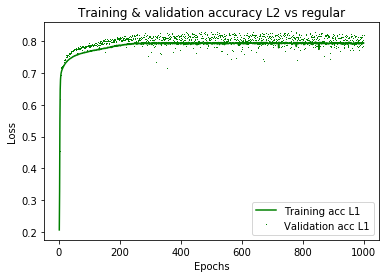

In [29]:
L1_model_dict = L1_model.history
plt.clf()

acc_values = L1_model_dict['acc'] 
val_acc_values = L1_model_dict['val_acc']

epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'g', label='Training acc L1')
plt.plot(epochs, val_acc_values, 'g,', label='Validation acc L1')
plt.title('Training & validation accuracy L2 vs regular')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [30]:
results_train = model.evaluate(train_final, label_train_final)

results_test = model.evaluate(X_test, y_test)

1500/1500 [==============================] - 0s 46us/step


In [31]:
results_train

[0.7505290083968121, 0.8008695652049521]

In [32]:
results_test

[0.7843376790682475, 0.7753333338101704]

This is about the best we've seen so far, but we were training for quite a while! Let's see if dropout regularization can do even better and/or be more efficient!

## Dropout Regularization

In [33]:
random.seed(123)
model = models.Sequential()
model.add(layers.Dropout(0.3, input_shape=(2000,)))
model.add(layers.Dense(50, activation='relu')) #2 hidden layers
model.add(layers.Dropout(0.3))
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

dropout_model = model.fit(train_final,
                    label_train_final,
                    epochs=200,
                    batch_size=256,
                    validation_data=(val, label_val))

Train on 57500 samples, validate on 1000 samples
Epoch 1/200
57500/57500 [==============================] - 3s 56us/step - loss: 1.9224 - acc: 0.1966 - val_loss: 1.8443 - val_acc: 0.2840
Epoch 2/200
57500/57500 [==============================] - 3s 51us/step - loss: 1.8207 - acc: 0.2740 - val_loss: 1.6860 - val_acc: 0.4280
Epoch 3/200
57500/57500 [==============================] - 3s 51us/step - loss: 1.6919 - acc: 0.3455 - val_loss: 1.4884 - val_acc: 0.5410
Epoch 4/200
57500/57500 [==============================] - 3s 51us/step - loss: 1.5549 - acc: 0.4114 - val_loss: 1.3009 - val_acc: 0.6290
Epoch 5/200
57500/57500 [==============================] - 3s 55us/step - loss: 1.4363 - acc: 0.4603 - val_loss: 1.1517 - val_acc: 0.6840
Epoch 6/200
57500/57500 [==============================] - 3s 52us/step - loss: 1.3349 - acc: 0.4962 - val_loss: 1.0379 - val_acc: 0.7060
Epoch 7/200
57500/57500 [==============================] - 3s 51us/step - loss: 1.2620 - acc: 0.5293 - val_loss: 0.9570 - v

57500/57500 [==============================] - 3s 51us/step - loss: 0.7242 - acc: 0.7322 - val_loss: 0.5110 - val_acc: 0.8060
Epoch 60/200
57500/57500 [==============================] - 3s 52us/step - loss: 0.7270 - acc: 0.7328 - val_loss: 0.5101 - val_acc: 0.8110
Epoch 61/200
57500/57500 [==============================] - 3s 50us/step - loss: 0.7257 - acc: 0.7308 - val_loss: 0.5105 - val_acc: 0.8080
Epoch 62/200
57500/57500 [==============================] - 3s 50us/step - loss: 0.7242 - acc: 0.7330 - val_loss: 0.5111 - val_acc: 0.8100
Epoch 63/200
57500/57500 [==============================] - 3s 51us/step - loss: 0.7195 - acc: 0.7329 - val_loss: 0.5108 - val_acc: 0.8080
Epoch 64/200
57500/57500 [==============================] - 3s 51us/step - loss: 0.7184 - acc: 0.7340 - val_loss: 0.5068 - val_acc: 0.8110
Epoch 65/200
57500/57500 [==============================] - 3s 51us/step - loss: 0.7171 - acc: 0.7364 - val_loss: 0.5060 - val_acc: 0.8100
Epoch 66/200
57500/57500 [==============

Epoch 118/200
57500/57500 [==============================] - 3s 51us/step - loss: 0.6580 - acc: 0.7654 - val_loss: 0.4756 - val_acc: 0.8340
Epoch 119/200
57500/57500 [==============================] - 3s 52us/step - loss: 0.6520 - acc: 0.7661 - val_loss: 0.4756 - val_acc: 0.8330
Epoch 120/200
57500/57500 [==============================] - 3s 52us/step - loss: 0.6522 - acc: 0.7672 - val_loss: 0.4762 - val_acc: 0.8320
Epoch 121/200
57500/57500 [==============================] - 3s 53us/step - loss: 0.6515 - acc: 0.7650 - val_loss: 0.4718 - val_acc: 0.8390
Epoch 122/200
57500/57500 [==============================] - 3s 52us/step - loss: 0.6476 - acc: 0.7654 - val_loss: 0.4705 - val_acc: 0.8330
Epoch 123/200
57500/57500 [==============================] - 3s 50us/step - loss: 0.6454 - acc: 0.7685 - val_loss: 0.4721 - val_acc: 0.8320
Epoch 124/200
57500/57500 [==============================] - 3s 52us/step - loss: 0.6499 - acc: 0.7660 - val_loss: 0.4715 - val_acc: 0.8320
Epoch 125/200
57500/

57500/57500 [==============================] - 3s 52us/step - loss: 0.6143 - acc: 0.7818 - val_loss: 0.4588 - val_acc: 0.8400
Epoch 177/200
57500/57500 [==============================] - 3s 55us/step - loss: 0.6140 - acc: 0.7801 - val_loss: 0.4577 - val_acc: 0.8440
Epoch 178/200
57500/57500 [==============================] - 3s 50us/step - loss: 0.6133 - acc: 0.7806 - val_loss: 0.4600 - val_acc: 0.8340
Epoch 179/200
57500/57500 [==============================] - 3s 52us/step - loss: 0.6135 - acc: 0.7818 - val_loss: 0.4586 - val_acc: 0.8370
Epoch 180/200
57500/57500 [==============================] - 3s 52us/step - loss: 0.6130 - acc: 0.7818 - val_loss: 0.4560 - val_acc: 0.8400
Epoch 181/200
57500/57500 [==============================] - 3s 52us/step - loss: 0.6138 - acc: 0.7807 - val_loss: 0.4577 - val_acc: 0.8460
Epoch 182/200
57500/57500 [==============================] - 3s 52us/step - loss: 0.6091 - acc: 0.7827 - val_loss: 0.4575 - val_acc: 0.8410
Epoch 183/200
57500/57500 [=======

In [34]:
results_train = model.evaluate(train_final, label_train_final)
results_test = model.evaluate(X_test, y_test)

1500/1500 [==============================] - 0s 48us/step


In [35]:
results_train

[0.38024211694468624, 0.8748000000041464]

In [36]:
results_test

[0.4971508943239848, 0.8033333336512247]

You can see here that the validation performance has improved again! the variance did become higher again compared to L1-regularization.

## Bigger Data?

In the lecture, one of the solutions to high variance was just getting more data. We actually *have* more data, but took a subset of 10,000 units before. Let's now quadruple our data set, and see what happens. Note that we are really just lucky here, and getting more data isn't always possible, but this is a useful exercise in order to understand the power of big data sets.

In [37]:
df = pd.read_csv('Bank_complaints.csv')
random.seed(123)
df = df.sample(40000)
df.index = range(40000)
product = df["Product"]
complaints = df["Consumer complaint narrative"]

#one-hot encoding of the complaints
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(complaints)
sequences = tokenizer.texts_to_sequences(complaints)
one_hot_results= tokenizer.texts_to_matrix(complaints, mode='binary')
word_index = tokenizer.word_index
np.shape(one_hot_results)

#one-hot encoding of products
le = preprocessing.LabelEncoder()
le.fit(product)
list(le.classes_)
product_cat = le.transform(product) 
product_onehot = to_categorical(product_cat)

# train test split
test_index = random.sample(range(1,40000), 4000)
test = one_hot_results[test_index]
train = np.delete(one_hot_results, test_index, 0)
label_test = product_onehot[test_index]
label_train = np.delete(product_onehot, test_index, 0)

#Validation set
random.seed(123)
val = train[:3000]
train_final = train[3000:]
label_val = label_train[:3000]
label_train_final = label_train[3000:]

In [38]:
random.seed(123)
model = models.Sequential()
model.add(layers.Dense(50, activation='relu', input_shape=(2000,))) #2 hidden layers
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

moredata_model = model.fit(train_final,
                    label_train_final,
                    epochs=120,
                    batch_size=256,
                    validation_data=(val, label_val))

Train on 33000 samples, validate on 3000 samples
Epoch 1/120
33000/33000 [==============================] - 1s 40us/step - loss: 1.8931 - acc: 0.2074 - val_loss: 1.8488 - val_acc: 0.2337
Epoch 2/120
33000/33000 [==============================] - 1s 30us/step - loss: 1.7731 - acc: 0.2952 - val_loss: 1.7063 - val_acc: 0.3687
Epoch 3/120
33000/33000 [==============================] - 1s 30us/step - loss: 1.6002 - acc: 0.4384 - val_loss: 1.5107 - val_acc: 0.5063
Epoch 4/120
33000/33000 [==============================] - 1s 29us/step - loss: 1.3922 - acc: 0.5540 - val_loss: 1.3066 - val_acc: 0.5803
Epoch 5/120
33000/33000 [==============================] - 1s 30us/step - loss: 1.1979 - acc: 0.6264 - val_loss: 1.1376 - val_acc: 0.6437
Epoch 6/120
33000/33000 [==============================] - 1s 30us/step - loss: 1.0444 - acc: 0.6681 - val_loss: 1.0115 - val_acc: 0.6760
Epoch 7/120
33000/33000 [==============================] - 1s 31us/step - loss: 0.9314 - acc: 0.6953 - val_loss: 0.9210 - v

33000/33000 [==============================] - 1s 38us/step - loss: 0.4042 - acc: 0.8569 - val_loss: 0.5882 - val_acc: 0.7987
Epoch 60/120
33000/33000 [==============================] - 1s 32us/step - loss: 0.4021 - acc: 0.8560 - val_loss: 0.5874 - val_acc: 0.7953
Epoch 61/120
33000/33000 [==============================] - 1s 31us/step - loss: 0.3996 - acc: 0.8585 - val_loss: 0.5878 - val_acc: 0.7977
Epoch 62/120
33000/33000 [==============================] - 1s 30us/step - loss: 0.3972 - acc: 0.8588 - val_loss: 0.5868 - val_acc: 0.7933
Epoch 63/120
33000/33000 [==============================] - 1s 30us/step - loss: 0.3954 - acc: 0.8593 - val_loss: 0.5885 - val_acc: 0.7963
Epoch 64/120
33000/33000 [==============================] - 1s 29us/step - loss: 0.3930 - acc: 0.8617 - val_loss: 0.5908 - val_acc: 0.7997
Epoch 65/120
33000/33000 [==============================] - 1s 30us/step - loss: 0.3908 - acc: 0.8606 - val_loss: 0.5876 - val_acc: 0.7973
Epoch 66/120
33000/33000 [==============

Epoch 118/120
33000/33000 [==============================] - 1s 30us/step - loss: 0.3115 - acc: 0.8919 - val_loss: 0.6455 - val_acc: 0.7880
Epoch 119/120
33000/33000 [==============================] - 1s 29us/step - loss: 0.3100 - acc: 0.8925 - val_loss: 0.6418 - val_acc: 0.7880
Epoch 120/120
33000/33000 [==============================] - 1s 29us/step - loss: 0.3089 - acc: 0.8928 - val_loss: 0.6449 - val_acc: 0.7887


In [44]:
results_train = model.evaluate(train_final, label_train_final)
results_test = model.evaluate(test, label_test)

4000/4000 [==============================] - 0s 22us/step


In [45]:
results_train

[0.29492314792401864, 0.8997272727272727]

In [46]:
results_test

[0.5750258494615554, 0.805]

With the same amount of epochs, we were able to get a fairly similar validation accuracy of 89.67 (compared to 88.55 in obtained in the first model in this lab). Our test set accuracy went up from 75.8 to a staggering 80.225% though, without any other regularization technique. You can still consider early stopping, L1, L2 and dropout here. It's clear that having more data has a strong impact on model performance!

## Additional Resources

* https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Consumer_complaints.ipynb
* https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/
* https://catalog.data.gov/dataset/consumer-complaint-database

## Summary  

In this lesson, we not only built an initial deep-learning model, we then used a validation set to tune our model using various types of regularization. From here, we'll continue to describe more practice and theory regarding tuning and optimizing deep-learning networks.